In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!ls /content/drive/My\ Drive

'AI IN INDIA.gdoc'
'AI prestentation.gdoc'
 bank_transactions_data_2.csv
 Classroom
'Colab Notebooks'
'COVER LETTER 2025                                                                                 Roskilde.gdoc'
 df1_meta.csv
 Einstein.gdoc
 Fake.csv
'Fake Postings.csv'
'Fendous  blood group detection app.gdoc'
'Fendous@ detection of phishing mail.gdoc'
'kaggle (5).json'
'LISTEN TO YOUR HEART.gslides'
 movie_metadata.csv
 movies_metadata.csv
 new.csv
 Nupur_Project_ppt.pptx
 predictions_plot.png
'Project proposal.gdoc'
 reviews.txt
 Singh_nupur.pdf
 Sleep_health_and_lifestyle_dataset.csv
 SMSSpamCollection.txt
'spam (1).csv'
 test.csv
 tmdb_5000_movies1.csv
 train.csv
'Untitled document (1).gdoc'
'Untitled document (2).gdoc'
'Untitled document.gdoc'
 val.csv
 YoutubeCommentsDataSet.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
 csv_path = "/content/drive/My Drive/train.csv"
 df = pd.read_csv(csv_path)

In [5]:
df.head(4)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1


In [6]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [7]:
df.shape

(20800, 5)

In [8]:
df.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [11]:
x = df.drop("label",axis =1 )

In [12]:
y = df["label"]

In [13]:
x.shape

(18285, 4)

In [14]:
y.shape

(18285,)

In [15]:
import tensorflow as tf

In [16]:
print(tf.__version__)

2.18.0


In [17]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [18]:
voc_size = 5000

ONE  HOT REPRESENTATION

In [19]:
messages = x.copy()

In [20]:
messages["title"][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [21]:
import nltk
import re
from nltk.corpus import stopwords

In [22]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
messages.reset_index(drop=True,inplace=True)
corpus = []
for i in range(0,len(messages)):
  review = re.sub("[^a-zA-Z]"," ",messages["title"][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word)for word in review if not word in stopwords.words("english")]
  review = " ".join(review)
  corpus.append(review)

In [24]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [25]:
one_hot_repr = [one_hot(words,voc_size)for words in corpus]

In [26]:
one_hot_repr

[[4966, 2214, 4335, 3402, 4462, 4350, 130, 4138, 3068, 4312],
 [2192, 930, 3186, 2493, 3202, 3558, 2689],
 [3045, 3828, 957, 2782],
 [3856, 793, 4955, 3247, 2209, 864],
 [4873, 3202, 3314, 2537, 4773, 3589, 3202, 2791, 3616, 471],
 [983,
  1373,
  1770,
  4082,
  2434,
  3211,
  4068,
  3379,
  3152,
  3596,
  3851,
  163,
  4239,
  3952,
  2689],
 [4127, 3620, 3693, 1114, 3238, 3048, 2818, 4182, 2640, 149, 2959],
 [11, 564, 4910, 4259, 4528, 1441, 3211, 3880, 2640, 149, 2959],
 [529, 4891, 3041, 2620, 412, 1881, 370, 3723, 3211, 3198],
 [1448, 3898, 1125, 738, 1459, 4078, 2221, 964],
 [4648, 3563, 28, 1354, 1998, 615, 199, 3969, 707, 2511, 2630],
 [3247, 611, 4462, 1881, 3211, 4528],
 [2223, 826, 3563, 914, 2851, 3293, 3102, 3260, 4968],
 [3580, 683, 1129, 1606, 3198, 3246, 3991, 2640, 149, 2959],
 [4683, 4569, 3760, 1445, 3927, 2640, 149, 2959],
 [4327, 2850, 2432, 4247, 4046, 799, 2114, 2611, 2572, 388],
 [3070, 3833, 930],
 [975, 3106, 1763, 2135, 3211, 1733, 1717, 2689],
 [77, 200

In [27]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [28]:
one_hot_repr[1]

[2192, 930, 3186, 2493, 3202, 3558, 2689]

Embedding Representation:

In [29]:
sent_length = 20
embedded_docs = pad_sequences(one_hot_repr,padding="pre",maxlen= sent_length)
print(embedded_docs)

[[   0    0    0 ... 4138 3068 4312]
 [   0    0    0 ... 3202 3558 2689]
 [   0    0    0 ... 3828  957 2782]
 ...
 [   0    0    0 ... 2640  149 2959]
 [   0    0    0 ... 1477 3391 1977]
 [   0    0    0 ... 4983 2232 2012]]


In [30]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4966,
       2214, 4335, 3402, 4462, 4350,  130, 4138, 3068, 4312], dtype=int32)

In [31]:
embedded_docs[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 2192,  930, 3186, 2493, 3202, 3558, 2689], dtype=int32)

In [32]:
## creating a model
# Create the model
embedding_vector_features= 40
model = Sequential()
model.add(Embedding(input_dim=voc_size, output_dim=embedding_vector_features))
model.add(LSTM(100))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Build the model with input shape
model.build(input_shape=(None, sent_length))  # Explicitly setting input shape

# Print the model summary
print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 20, 40)              │         200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          56,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 256,501 (1001.96 KB)

 Trainable params: 256,501 (1001.96 KB)

 Non-trainable params: 0 (0.00 B)

None


In [33]:
len(embedded_docs),y.shape

(18285, (18285,))

In [34]:
import numpy as np
x_final = np.array(embedded_docs)
y_final = np.array(y)

In [35]:
x_final.shape,y_final.shape

((18285, 20), (18285,))

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_final,y_final,test_size=0.33,random_state=42)

Model Training

In [38]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9993 - loss: 0.0045 - val_accuracy: 0.9037 - val_loss: 0.5985
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9974 - loss: 0.0082 - val_accuracy: 0.9046 - val_loss: 0.5692
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9988 - loss: 0.0048 - val_accuracy: 0.9036 - val_loss: 0.6649
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9990 - loss: 0.0031 - val_accuracy: 0.9054 - val_loss: 0.7255
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9997 - loss: 0.0021 - val_accuracy: 0.9044 - val_loss: 0.7501
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9999 - loss: 8.5703e-04 - val_accuracy: 0.9051 - val_loss: 0.7929
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 4.2469e-04 - val_accuracy: 0.9056 - val_loss: 0.8309
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 2.6646e-04 - val_

Performance metrics and accuracy

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [40]:
y_pred = model.predict(x_test)

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [43]:
y_pred = np.where(y_pred > 0.5, 1.0, 0.0)



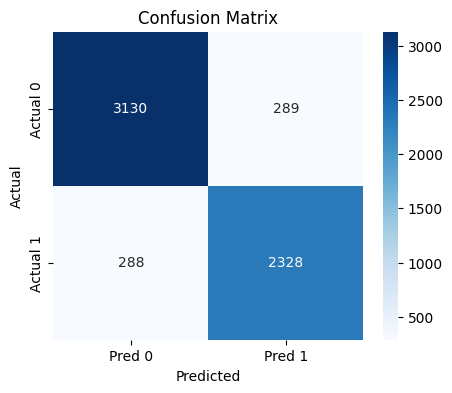

In [47]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [48]:
accuracy_score(y_test,y_pred)

0.9043910521955261

In [49]:
confusion_matrix(y_test,y_pred)

array([[3130,  289],
       [ 288, 2328]])

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3419
           1       0.89      0.89      0.89      2616

    accuracy                           0.90      6035
   macro avg       0.90      0.90      0.90      6035
weighted avg       0.90      0.90      0.90      6035

